In [672]:
import sklearn as sk
import sklearn.model_selection
import scipy as sp
import pandas as pd
import numpy as np  
import math
import random
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from pandas.tools.plotting import parallel_coordinates
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
from sklearn.random_projection import GaussianRandomProjection
from sklearn.cluster import FeatureAgglomeration
from sklearn.neural_network import MLPClassifier

%matplotlib inline 

In [673]:
read_data = pd.read_csv("bank/bank.csv", delimiter=";").drop(columns=['duration'])
data_as_list = np.array(read_data.values.tolist())

In [115]:
def convert_categorical_to_numerical(data):
    num_columns = data.shape[1]
    le = LabelEncoder()
    for i in range(num_columns):
        le.fit(data[:,i])
        data[:,i] = le.transform(data[:,i])
    return data

In [116]:
def score_unsupervised_model(clusters, labels): 
    accuracy = "accuracy: " + str(accuracy_score(clusters, labels))
    precision = "precision: " + str(precision_score(clusters, labels))
    recall = "recall: " + str(recall_score(clusters, labels))
    f1 = "f1: " + str(f1_score(clusters, labels))
    return [accuracy, precision, recall, f1]

In [117]:
data = convert_categorical_to_numerical(data_as_list)
unlabeled_bank = preprocessing.scale(data[:,0:15])
bank_labels = data[:,15:16].ravel().astype(float)

/Users/chaitanyamittal/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype <U21 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [210]:
#CLUSTERING

#1) KMEANS 

kmeans_bank = KMeans(n_clusters=2, random_state=10).fit(unlabeled_bank)
clusters_kmeans = kmeans_bank.labels_
print(score_unsupervised_model(bank_labels, clusters_kmeans))

['accuracy: 0.7883211678832117', 'precision: 0.22122762148337596', 'recall: 0.33205374280230326', 'f1: 0.26554105909439757']


In [211]:
def elbow_method(unlabeled_dataset, dataset_name):
    plt.figure(figsize=(9, 6))
    plt.plot()
    colors = ['b', 'g', 'r']
    markers = ['o', 'v', 's']

    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(unlabeled_dataset)
        distortions.append(sum(np.min(cdist(unlabeled_dataset, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / unlabeled_dataset.shape[0])

    # Plot elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method showing optimal k for ' + dataset_name)
    plt.show()

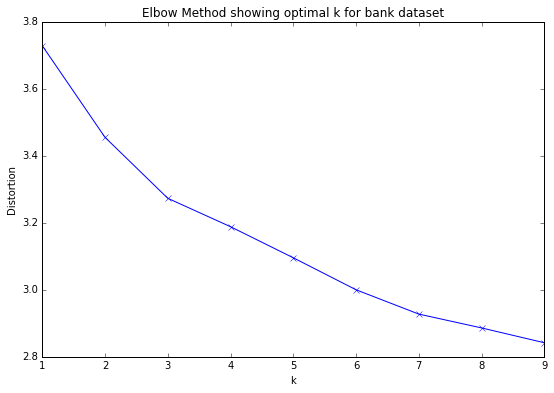

In [212]:
elbow_method(unlabeled_bank, "bank dataset")

In [126]:
bank_tnse = TSNE(n_components=2).fit_transform(unlabeled_bank)

In [224]:
def visualize_clusters(data, model, clusters, dataset_name, model_name, has_centers=True):
    plt.figure(figsize=(9, 6))
    plt.title(model_name + ' clusters on t-distributed stochastic neighbor embedding (TSNE) of ' + dataset_name)
    plt.scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='viridis')
    if has_centers:
        centers = model.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

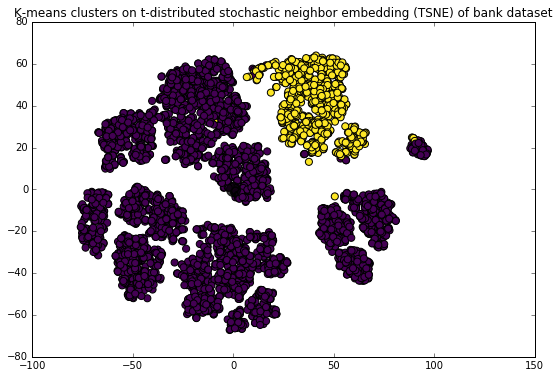

In [233]:
#Binary Kmeans Clustering
visualize_clusters(bank_tnse, kmeans_bank, clusters_kmeans, "bank dataset", "K-means")

In [234]:
kmeans_bank_optimal = KMeans(n_clusters=3, random_state=10).fit(unlabeled_bank)
clusters_kmeans_optimal = kmeans_bank_optimal.labels_

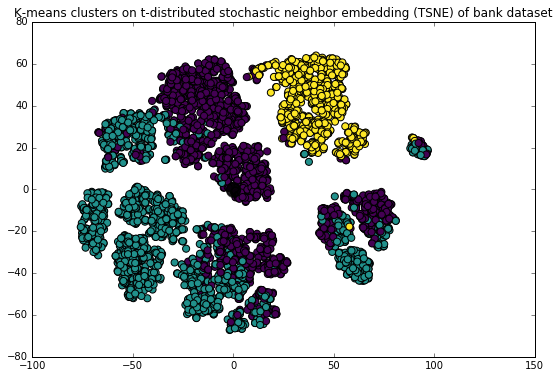

In [235]:
visualize_clusters(bank_tnse, kmeans_bank_optimal, clusters_kmeans_optimal, "bank dataset", "K-means")

In [227]:
#2) EXPECTATION MAXIMIZATION

gaussian_bank = GaussianMixture(n_components=2, random_state=10).fit(unlabeled_bank)
clusters_gaussian = gaussian_bank.predict(unlabeled_bank)
print(score_unsupervised_model(bank_labels, clusters_gaussian))

['accuracy: 0.7856668878566688', 'precision: 0.22549019607843138', 'recall: 0.3531669865642994', 'f1: 0.275243081525804']


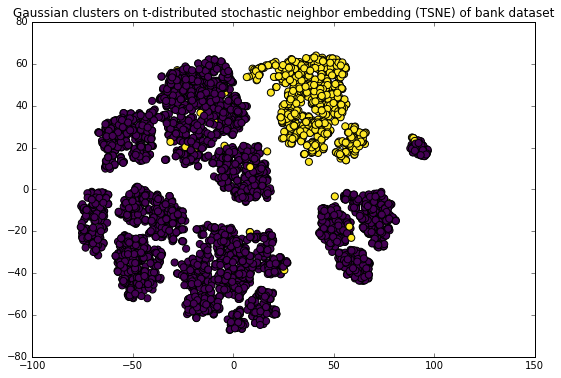

In [232]:
#Binary Gaussian Clustering
visualize_clusters(bank_tnse, gaussian_bank, clusters_gaussian, "bank dataset", "Gaussian", has_centers=False)

In [231]:
gaussian_bank_optimal = GaussianMixture(n_components=3, random_state=0).fit(unlabeled_bank)
clusters_gaussian_optimal = gaussian_bank_optimal.predict(unlabeled_bank)

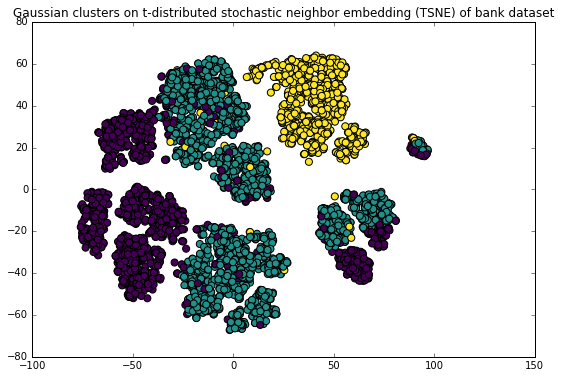

In [229]:
#Optimal Clusters, according to Kmeans
visualize_clusters(bank_tnse, gaussian_bank_optimal, clusters_gaussian_optimal, "bank dataset", "Gaussian", has_centers=False)

In [400]:
#DIMENSIONALITY REDUCTION

#1) PCA

In [416]:
def num_components_vs_explained_ratio(dataset, dataset_name, dim_type):
    plt.figure(figsize=(9, 6))
    plt.plot()
    colors = ['b', 'g', 'r']
    markers = ['o', 'v', 's']

    variance_ratios = [0]
    cumulative_variances = []
    num_features = range(0, dataset.shape[1])
    pca = PCA(n_components = dataset.shape[1]).fit(dataset)
    variance_ratios = pca.explained_variance_ratio_
    
    for i in num_features:
        cumulative_variances.append(sum(variance_ratios[0:i]))

    # Plot variance plot
    plt.plot(num_features, cumulative_variances, 'bx-')
    plt.xlabel('Num Components')
    plt.ylabel('Percentage of Variance Explained by Features')
    plt.title('Explained variance ratio for different num components picked by ' + dim_type + ' for ' + dataset_name)
    plt.show()


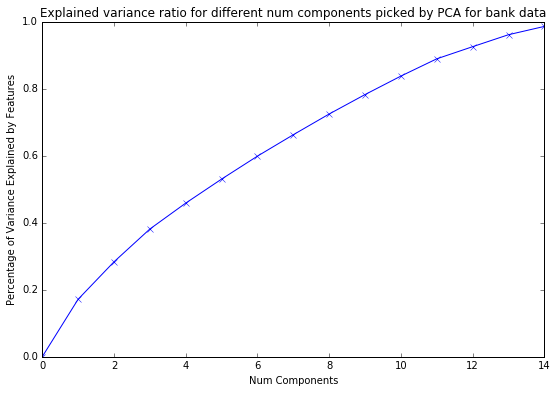

In [417]:
num_components_vs_explained_ratio(unlabeled_bank, "bank data", "PCA")

In [419]:
def eigenvalue_distribution(dataset, dataset_name, dim_type):
    plt.figure(figsize=(9, 6))
    plt.plot()
    colors = ['b', 'g', 'r']
    markers = ['o', 'v', 's']

    pca = PCA(n_components = dataset.shape[1]).fit(dataset)
    variance_ratios = pca.explained_variance_ratio_

    # Plot variance plot
    plt.plot(range(1, len(variance_ratios)+1), variance_ratios, 'bx-')
    plt.xlabel('Num Components')
    plt.ylabel('Eigenvalue multiplied by some scalar')
    plt.title('Distribution of eigenvalues after  ' + dim_type + ' for ' + dataset_name)
    plt.show()

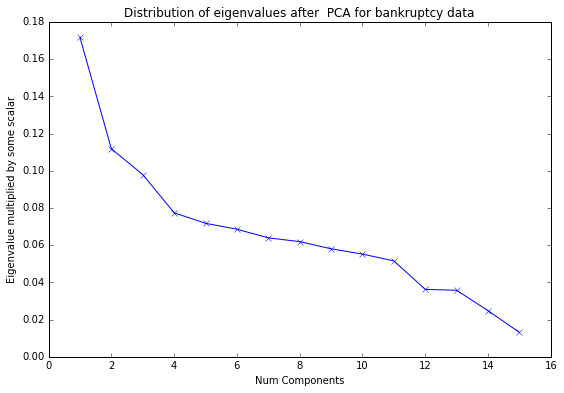

In [421]:
eigenvalue_distribution(unlabeled_bank, "bankruptcy data", "PCA")

In [396]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

def visualize_PCA(dataset, feature1, feature2):
    # plot data
    plt.scatter(dataset[:, feature1], dataset[:, feature2], alpha=0.2)
    plt.title("Component analysis of features " + str(feature1) + " and  " + str(feature2))
    pca = PCA(n_components=2)
    just_two_features = np.column_stack((dataset[:, feature1], dataset[:, feature2]))
    pca.fit(just_two_features)
    
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_, pca.mean_ + v)
    plt.axis('equal')
    plt.show()

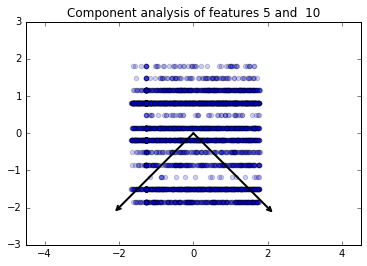

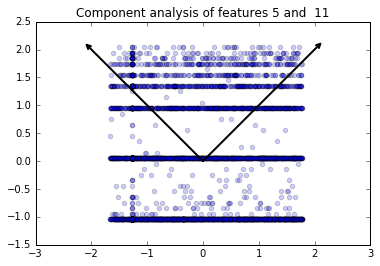

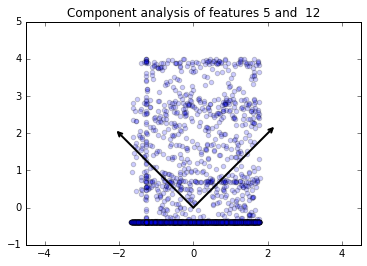

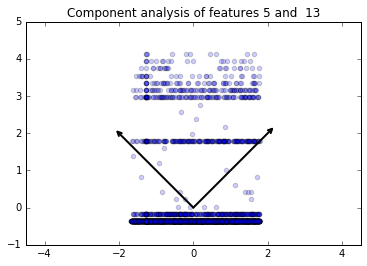

In [399]:
for i in range(10, 14):
    visualize_PCA(unlabeled_bank, 5, i)

In [505]:
def reduce_dataset_PCA(dataset, num_components):
    pca = PCA(n_components=num_components)
    reduced_pca_dataset = pca.fit_transform(dataset)
    return reduced_pca_dataset

pca_bank = reduce_dataset_PCA(unlabeled_bank, 10)

In [490]:
#2) ICA

In [637]:
def get_ICA_components_kurtosis(dataset):
    all_kurts = []
    for i in range(1, dataset.shape[1] + 1):
        ica = FastICA(n_components=i, max_iter=100, tol=0.005)
        new_data = ica.fit_transform(dataset)
        kurts = []
        for j in range(0, i):
            kurts.append(abs(kurtosis(new_data[:, j])))
        all_kurts.append(np.mean(kurts))
    return all_kurts

In [496]:
bank_kurts = get_ICA_components_kurtosis(unlabeled_bank)

In [639]:
def plot_kurtosis(kurtosis, dataset_name):
    plt.figure(figsize=(9, 6))
    plt.plot()
    colors = ['b', 'g', 'r']
    markers = ['o', 'v', 's']

    # Plot variance plot
    plt.plot(range(0, len(kurtosis)), kurtosis, 'bx-')
    plt.xlabel('Num Components')
    plt.ylabel('Average kurtosis across components')
    plt.title('Distribution of kurtosis versus number components after ICA for ' + dataset_name)
    plt.show()

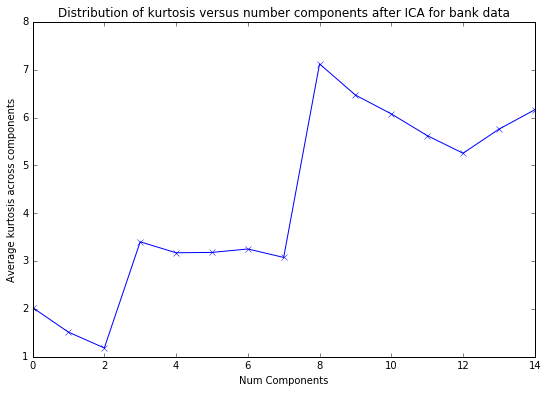

In [640]:
plot_kurtosis(bank_kurts, "bank data")

In [506]:
def reduce_dataset_ICA(dataset, num_components):
    ica = FastICA(n_components=num_components)
    reduced_ica_dataset = ica.fit_transform(dataset)
    return reduced_ica_dataset

ica_bank = reduce_dataset_ICA(unlabeled_bank, 8)

In [539]:
def loss_through_ICA(dataset):  
    losses = []
    for i in range(1, dataset.shape[1] + 1):
        ica = FastICA(n_components=i, max_iter=1000, tol=0.001)
        projected_data = ica.fit_transform(dataset)
        inverse = ica.inverse_transform(projected_data)
        loss = ((dataset - inverse)**2).mean()
        losses.append(loss)
    return losses

In [542]:
bank_loss_ica = loss_through_ICA(unlabeled_bank)

In [543]:
def plot_ica_loss(loss, dataset_name):
    plt.figure(figsize=(9, 6))
    plt.plot()
    colors = ['b', 'g', 'r']
    markers = ['o', 'v', 's']

    # Plot variance plot
    plt.plot(range(0, len(loss)), loss, 'bx-')
    plt.xlabel('Num Components')
    plt.ylabel('Reconstruction loss through projection')
    plt.title('Num components chosen for ICA projection vs loss vs for ' + dataset_name)
    plt.show()

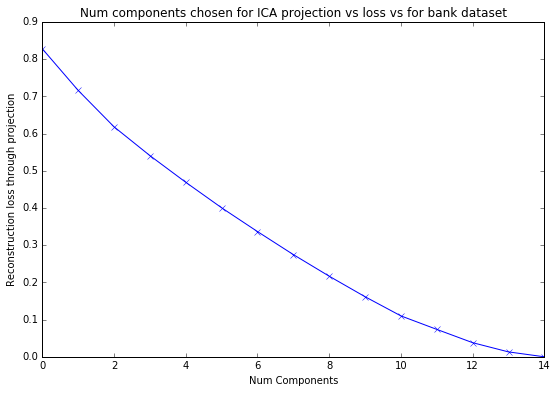

In [544]:
plot_ica_loss(bank_loss_ica, "bank dataset")

In [526]:
#3) Randomized Projections

In [550]:
def loss_through_RP(dataset):  
    losses = []
    for i in range(1, dataset.shape[1] + 1):
        randomized = GaussianRandomProjection(n_components = i, eps =.2)
        randomized_proj = randomized.fit_transform(dataset)
        randMatrix = randomized.components_
        inverse = randomized_proj.dot(randMatrix)
        loss = ((dataset - inverse)**2).mean()
        losses.append(loss)
    return losses

In [551]:
bank_loss_RP = loss_through_RP(unlabeled_bank)

In [552]:
def plot_rp_loss(rp_loss, dataset_name):
    plt.figure(figsize=(9, 6))
    plt.plot()
    colors = ['b', 'g', 'r']
    markers = ['o', 'v', 's']

    # Plot variance plot
    plt.plot(range(0, len(rp_loss)), rp_loss, 'bx-')
    plt.xlabel('Num Components')
    plt.ylabel('Reconstruction loss through projection')
    plt.title('Num components chosen for randomized projection vs loss vs for ' + dataset_name)
    plt.show()

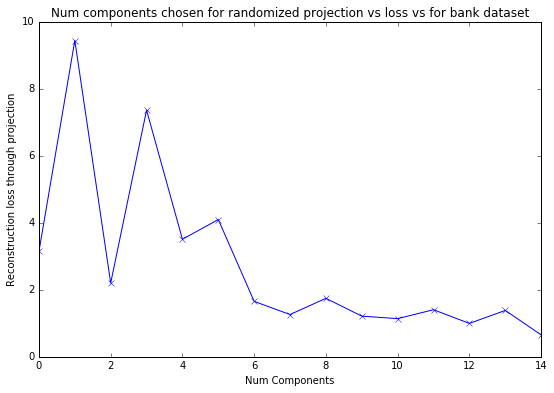

In [554]:
plot_rp_loss(bank_loss_RP, "bank dataset")

In [576]:
def reduce_dataset_randomized(dataset, num_components):
    randomized = GaussianRandomProjection(n_components = num_components, eps =.2)
    randomized_proj = randomized.fit_transform(dataset)
    return randomized_proj

In [659]:
randomized_bank = reduce_dataset_randomized(unlabeled_bank, 8)

In [537]:
def run_randomized_projections_n_times(dataset, iterations, num_components):
    losses = []
    for i in range(iterations):
        randomized = GaussianRandomProjection(n_components = num_components, eps =.2)
        randomized_proj = randomized.fit_transform(dataset)
        randMatrix = randomized.components_
        inverse = randomized_proj.dot(randMatrix)
        loss = ((dataset - inverse)**2).mean()
        losses.append(loss)
    return losses

In [555]:
bank_loss_rp_iter = run_randomized_projections_n_times(unlabeled_bank, 100, 6)

In [566]:
avg_loss = []
for i in range(len(bank_loss_rp_iter)):
    avg_loss.append(np.mean(bank_loss_rp_iter[0:i]))

/Users/chaitanyamittal/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/chaitanyamittal/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [665]:
def plot_rp_n_iterations(losses, avg_losses, dataset_name):
    plt.figure(figsize=(9, 6))
    plt.plot()
    colors = ['b', 'g', 'r']
    markers = ['o', 'v', 's']

    # Plot variance plot
    plt.plot(range(0, len(losses)), losses, 'bx-')
    plt.plot(range(0, len(losses)), avg_losses, 'bx-', c="black")
    plt.xlabel('Num iterations')
    plt.ylabel('Loss (in blue) and avg loss (in black) after iteration')
    plt.title('Loss after n iterations for ' + dataset_name)
    plt.show()

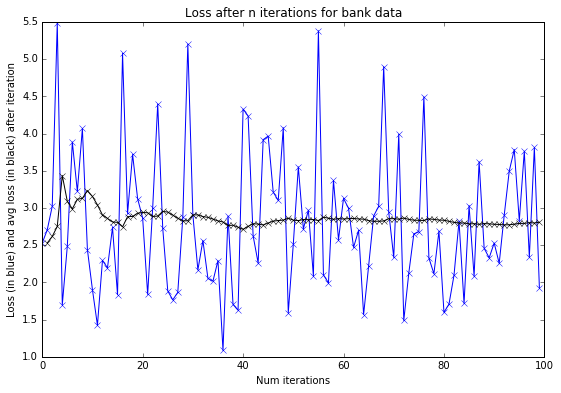

In [666]:
plot_rp_n_iterations(bank_loss_rp_iter, avg_loss, "bank data")

In [577]:
#4 FeatureAgglomeration

In [604]:
def loss_through_FA(dataset):  
    losses = []
    for i in range(1, dataset.shape[1] + 1):
        fa = FeatureAgglomeration(n_clusters=i)
        projected_data = fa.fit_transform(dataset)
        inverse = fa.inverse_transform(projected_data)
        loss = ((dataset - inverse)**2).mean()
        losses.append(loss)
    return losses

In [605]:
bank_loss_fa = loss_through_FA(unlabeled_bank)

In [855]:
def plot_fa_loss(loss, dataset_name):
    plt.figure(figsize=(9, 6))
    plt.plot()
    colors = ['b', 'g', 'r']
    markers = ['o', 'v', 's']

    # Plot variance plot
    plt.plot(range(0, len(loss)), loss, 'bx-')
    plt.xlabel('Num Components')
    plt.ylabel('Reconstruction loss through projection')
    plt.title('Num components chosen for FA projection vs loss vs for ' + dataset_name)
    plt.show()

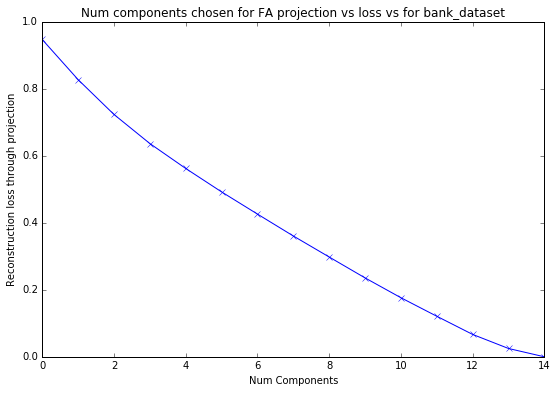

In [856]:
plot_fa_loss(bank_loss_fa, "bank_dataset")

In [600]:
def reduce_dataset_fa(dataset, num_components):
    fa = FeatureAgglomeration(n_clusters=num_components)
    fa_proj = fa.fit_transform(dataset)
    return fa_proj

In [611]:
fa_bank = reduce_dataset_fa(unlabeled_bank, 10)

In [ ]:
def loss_through_FA(dataset):  
    losses = []
    for i in range(1, dataset.shape[1] + 1):
        fa = FeatureAgglomeration(n_clusters=i)
        projected_data = fa.fit_transform(dataset)
        inverse = fa.inverse_transform(projected_data)
        loss = ((dataset - inverse)**2).mean()
        losses.append(loss)
    return losses

In [805]:
#CLUSTERING ON REDUCED DATA

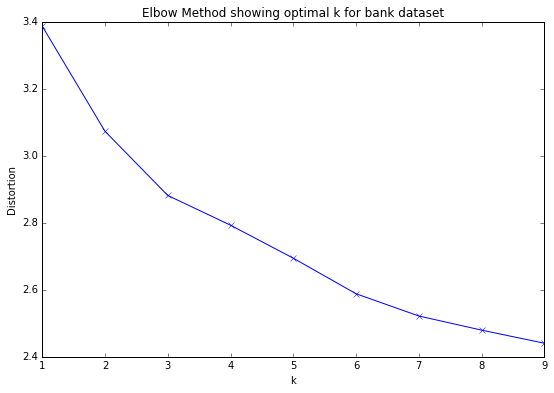

In [803]:
#PCA REDUCTION
elbow_method(pca_bank, "bank dataset")
bank_tnse_pca = TSNE(n_components=2).fit_transform(pca_bank)

['accuracy: 0.7885423578854236', 'precision: 0.220795892169448', 'recall: 0.33013435700575816', 'f1: 0.26461538461538464']
['accuracy: 0.7856668878566688', 'precision: 0.22549019607843138', 'recall: 0.3531669865642994', 'f1: 0.275243081525804']


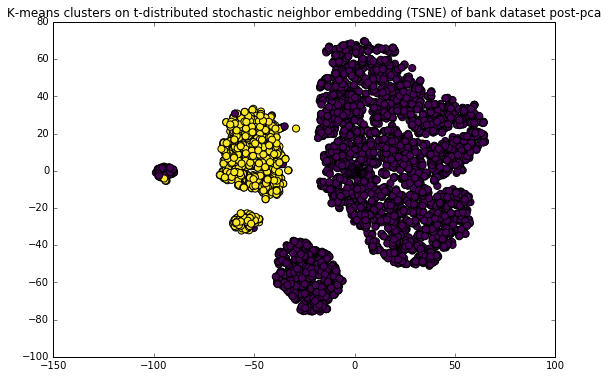

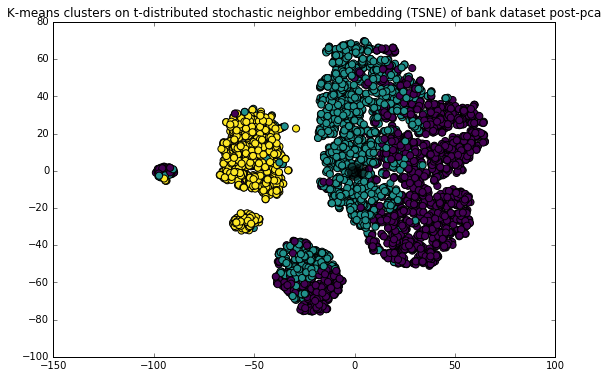

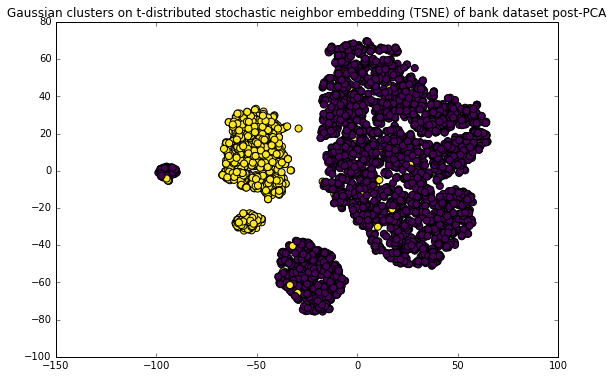

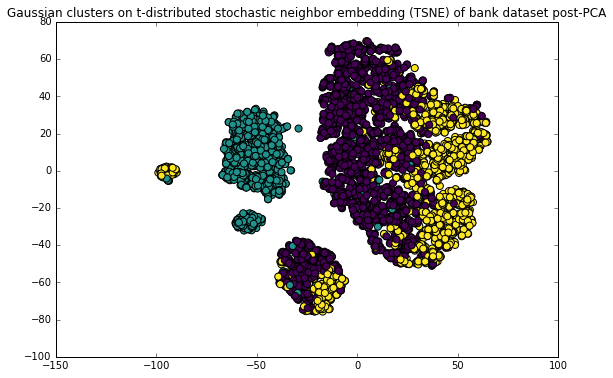

In [824]:
kmeans_bank_pca = KMeans(n_clusters=2, random_state=10).fit(pca_bank)
clusters_kmeans_pca = kmeans_bank_pca.labels_
print(score_unsupervised_model(bank_labels, clusters_kmeans_pca))
visualize_clusters(bank_tnse_pca, kmeans_bank_pca, clusters_kmeans_pca, "bank dataset post-pca", "K-means")
kmeans_bank_optimal_pca = KMeans(n_clusters=3, random_state=10).fit(pca_bank)
clusters_kmeans_optimal_pca = kmeans_bank_optimal_pca.labels_
visualize_clusters(bank_tnse_pca, kmeans_bank_optimal_pca, clusters_kmeans_optimal_pca, "bank dataset post-pca", "K-means")
gaussian_bank_pca = GaussianMixture(n_components=2, random_state=10).fit(pca_bank)
clusters_gaussian_pca = gaussian_bank_pca.predict(pca_bank)
print(score_unsupervised_model(bank_labels, clusters_gaussian_pca))
visualize_clusters(bank_tnse_pca, gaussian_bank_pca, clusters_gaussian_pca, "bank dataset post-PCA", "Gaussian", has_centers=False)
gaussian_bank_optimal_pca = GaussianMixture(n_components=3, random_state=0).fit(pca_bank)
clusters_gaussian_optimal_pca = gaussian_bank_optimal_pca.predict(pca_bank)
#Optimal Gaussian Clusters, according to Kmeans
visualize_clusters(bank_tnse_pca, gaussian_bank_optimal_pca, clusters_gaussian_optimal_pca, "bank dataset post-PCA", "Gaussian", has_centers=False)

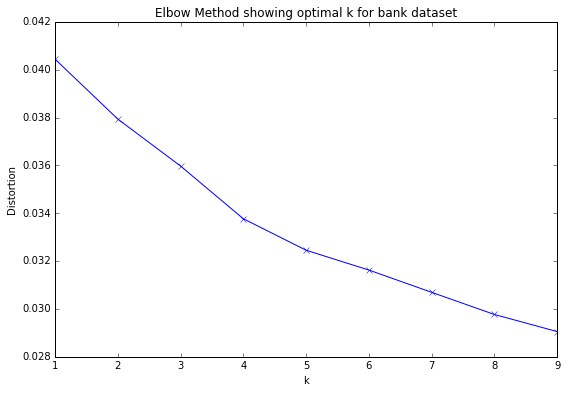

In [819]:
#ICA REDUCTION
elbow_method(ica_bank, "bank dataset")
bank_tnse_ica = TSNE(n_components=2).fit_transform(ica_bank)

['accuracy: 0.25724397257243975', 'precision: 0.12463614712887007', 'recall: 0.9040307101727447', 'f1: 0.21906976744186044']
['accuracy: 0.25724397257243975', 'precision: 0.12463614712887007', 'recall: 0.9040307101727447', 'f1: 0.21906976744186044']


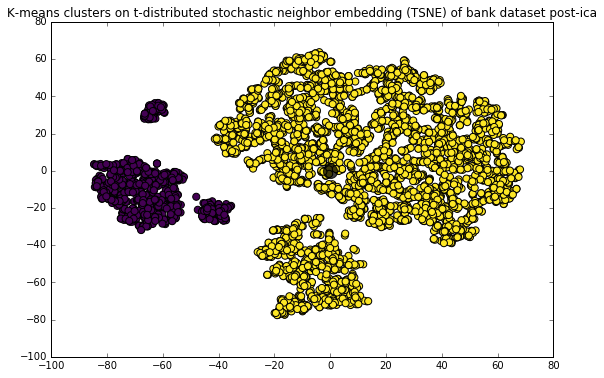

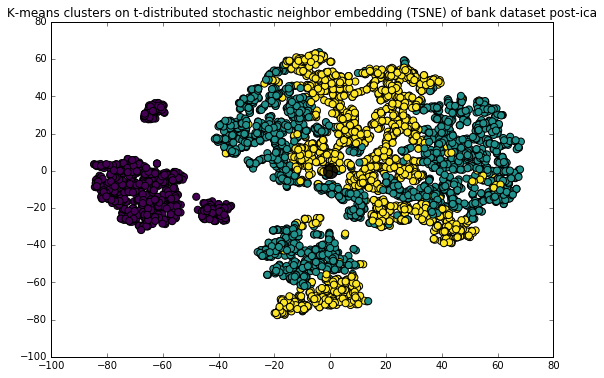

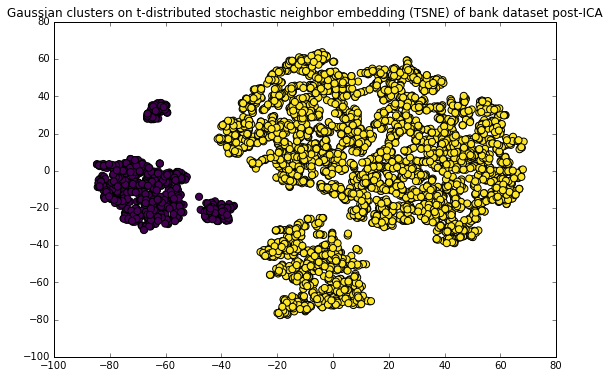

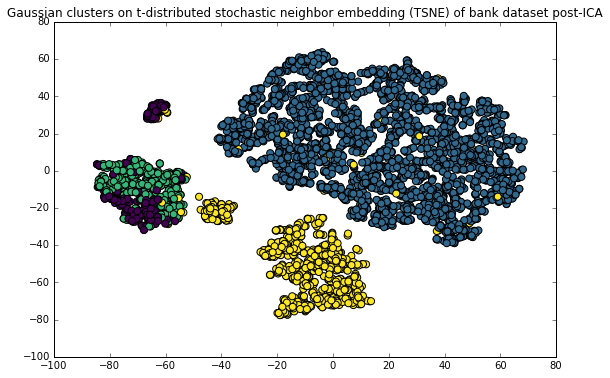

In [826]:
kmeans_bank_ica = KMeans(n_clusters=2, random_state=10).fit(ica_bank)
clusters_kmeans_ica = kmeans_bank_ica.labels_
print(score_unsupervised_model(bank_labels, clusters_kmeans_ica))
visualize_clusters(bank_tnse_ica, kmeans_bank_ica, clusters_kmeans_ica, "bank dataset post-ica", "K-means")
kmeans_bank_optimal_ica = KMeans(n_clusters=3, random_state=10).fit(ica_bank)
clusters_kmeans_optimal_ica = kmeans_bank_optimal_ica.labels_
visualize_clusters(bank_tnse_ica, kmeans_bank_optimal_ica, clusters_kmeans_optimal_ica, "bank dataset post-ica", "K-means")
gaussian_bank_ica = GaussianMixture(n_components=2, random_state=10).fit(ica_bank)
clusters_gaussian_ica = gaussian_bank_ica.predict(ica_bank)
print(score_unsupervised_model(bank_labels, clusters_gaussian_ica))
visualize_clusters(bank_tnse_ica, gaussian_bank_ica, clusters_gaussian_ica, "bank dataset post-ICA", "Gaussian", has_centers=False)
gaussian_bank_optimal_ica = GaussianMixture(n_components=4, random_state=0).fit(ica_bank)
clusters_gaussian_optimal_ica = gaussian_bank_optimal_ica.predict(ica_bank)
#Optimal Gaussian Clusters, according to Kmeans
visualize_clusters(bank_tnse_ica, gaussian_bank_optimal_ica, clusters_gaussian_optimal_ica, "bank dataset post-ICA", "Gaussian", has_centers=False)

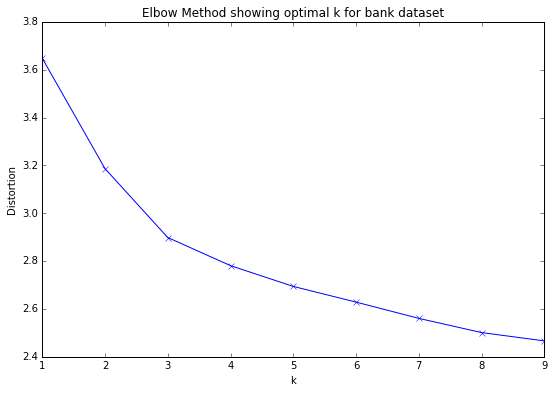

In [825]:
#RANDOMIZED REDUCTION
elbow_method(randomized_bank, "bank dataset")
bank_tnse_randomized = TSNE(n_components=2).fit_transform(randomized_bank)

['accuracy: 0.7858880778588808', 'precision: 0.21235521235521235', 'recall: 0.31669865642994244', 'f1: 0.2542372881355932']
['accuracy: 0.7861092678610927', 'precision: 0.22332506203473945', 'recall: 0.345489443378119', 'f1: 0.2712886209495102']


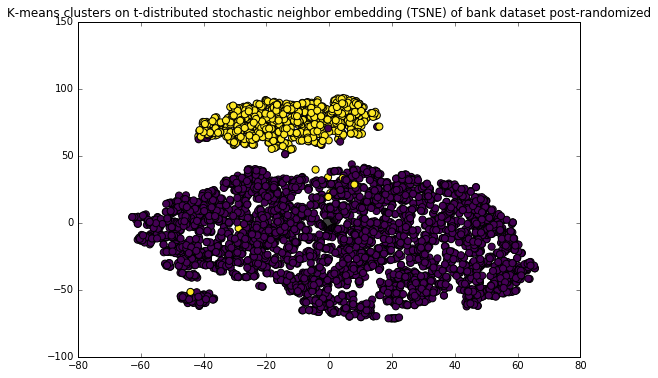

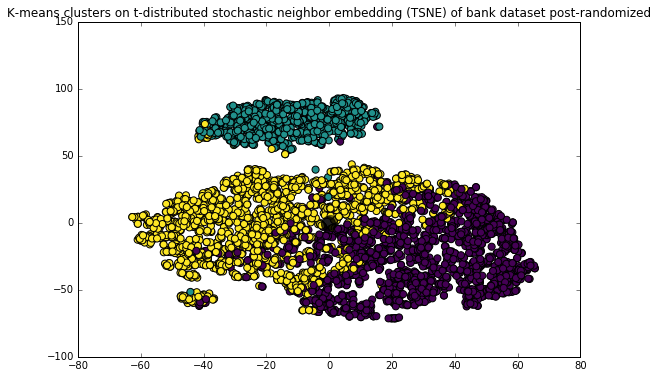

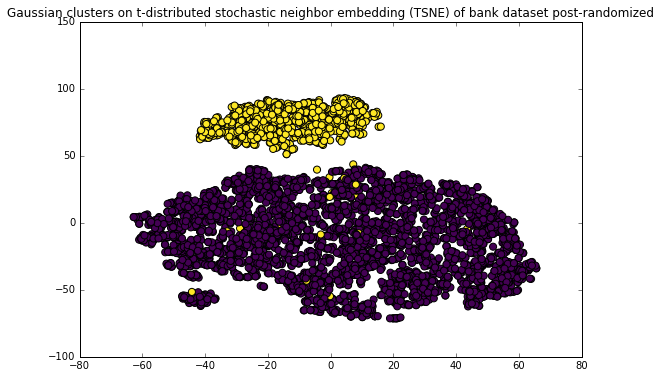

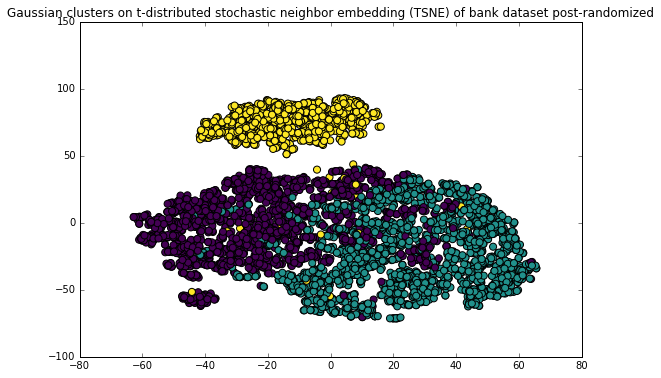

In [827]:
kmeans_bank_randomized = KMeans(n_clusters=2, random_state=10).fit(randomized_bank)
clusters_kmeans_randomized = kmeans_bank_randomized.labels_
print(score_unsupervised_model(bank_labels, clusters_kmeans_randomized))
visualize_clusters(bank_tnse_randomized, kmeans_bank_randomized, clusters_kmeans_randomized, "bank dataset post-randomized", "K-means")
kmeans_bank_optimal_randomized = KMeans(n_clusters=3, random_state=10).fit(randomized_bank)
clusters_kmeans_optimal_randomized = kmeans_bank_optimal_randomized.labels_
visualize_clusters(bank_tnse_randomized, kmeans_bank_optimal_randomized, clusters_kmeans_optimal_randomized, "bank dataset post-randomized", "K-means")
gaussian_bank_randomized = GaussianMixture(n_components=2, random_state=10).fit(randomized_bank)
clusters_gaussian_randomized = gaussian_bank_randomized.predict(randomized_bank)
print(score_unsupervised_model(bank_labels, clusters_gaussian_randomized))
visualize_clusters(bank_tnse_randomized, gaussian_bank_randomized, clusters_gaussian_randomized, "bank dataset post-randomized", "Gaussian", has_centers=False)
gaussian_bank_optimal_randomized = GaussianMixture(n_components=3, random_state=0).fit(randomized_bank)
clusters_gaussian_optimal_randomized = gaussian_bank_optimal_randomized.predict(randomized_bank)
#Optimal Gaussian Clusters, according to Kmeans
visualize_clusters(bank_tnse_randomized, gaussian_bank_optimal_randomized, clusters_gaussian_optimal_randomized, "bank dataset post-randomized", "Gaussian", has_centers=False)

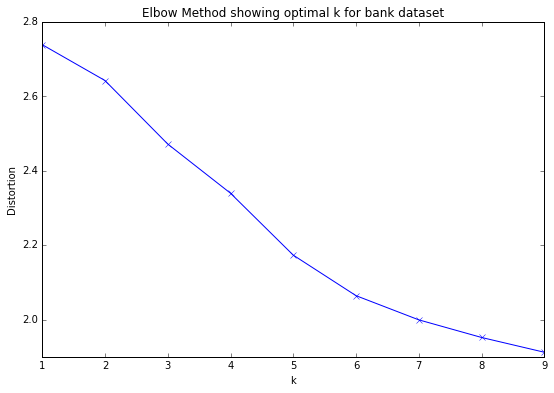

In [828]:
#Feature Agglomeration
elbow_method(fa_bank, "bank dataset")
bank_tnse_fa = TSNE(n_components=2).fit_transform(fa_bank)

['accuracy: 0.25724397257243975', 'precision: 0.12463614712887007', 'recall: 0.9040307101727447', 'f1: 0.21906976744186044']
['accuracy: 0.8719309887193099', 'precision: 0.11842105263157894', 'recall: 0.01727447216890595', 'f1: 0.03015075376884422']


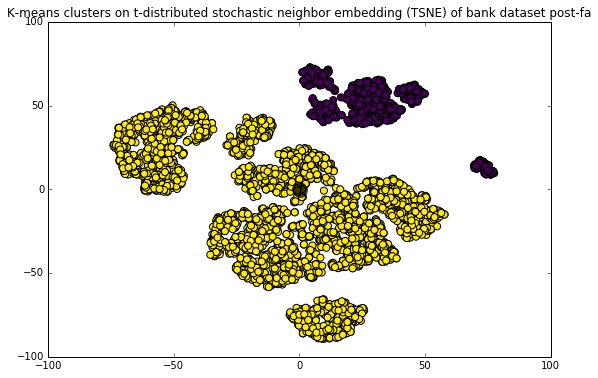

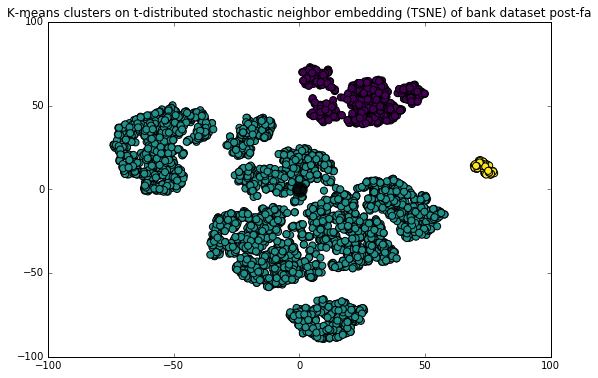

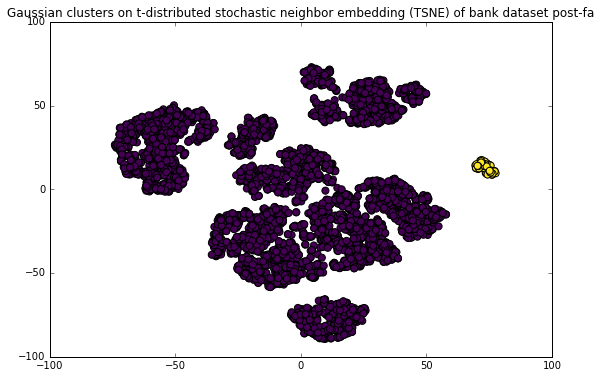

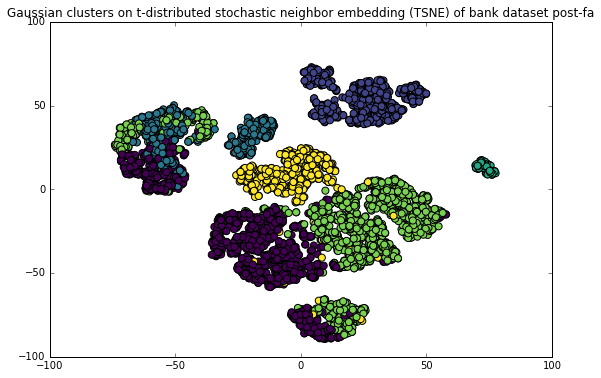

In [829]:
kmeans_bank_fa = KMeans(n_clusters=2, random_state=10).fit(fa_bank)
clusters_kmeans_fa = kmeans_bank_fa.labels_
print(score_unsupervised_model(bank_labels, clusters_kmeans_fa))
visualize_clusters(bank_tnse_fa, kmeans_bank_fa, clusters_kmeans_fa, "bank dataset post-fa", "K-means")
kmeans_bank_optimal_fa = KMeans(n_clusters=3, random_state=10).fit(fa_bank)
clusters_kmeans_optimal_fa = kmeans_bank_optimal_fa.labels_
visualize_clusters(bank_tnse_fa, kmeans_bank_optimal_fa, clusters_kmeans_optimal_fa, "bank dataset post-fa", "K-means")
gaussian_bank_fa = GaussianMixture(n_components=2, random_state=10).fit(fa_bank)
clusters_gaussian_fa = gaussian_bank_fa.predict(fa_bank)
print(score_unsupervised_model(bank_labels, clusters_gaussian_fa))
visualize_clusters(bank_tnse_fa, gaussian_bank_fa, clusters_gaussian_fa, "bank dataset post-fa", "Gaussian", has_centers=False)
gaussian_bank_optimal_fa = GaussianMixture(n_components=6, random_state=0).fit(fa_bank)
clusters_gaussian_optimal_fa = gaussian_bank_optimal_fa.predict(fa_bank)
#Optimal Gaussian Clusters, according to Kmeans
visualize_clusters(bank_tnse_fa, gaussian_bank_optimal_fa, clusters_gaussian_optimal_fa, "bank dataset post-fa", "Gaussian", has_centers=False)

In [671]:
#NEURAL NET ON DIMENSIONALITY REDUCTION

In [787]:
x_train_pca = pca_bank[0:3000]
y_train_pca = bank_labels[0:3000]
x_test_pca = pca_bank[3000:]
y_test_pca = bank_labels[3000:]
x_train_pca, y_train_pca = undersample_training(x_train_pca, y_train_pca, randomstate=2)

In [788]:
def undersample_training(x, y, randomstate=2):
    rus = RandomUnderSampler(random_state=randomstate)
    x_sample, y_sample = rus.fit_sample(x, y)
    return x_sample, y_sample

In [789]:
def classify(classifier, xtrain, ytrain, x_validation, y_validation): 
    scores = {}
    clf = classifier.fit(xtrain, ytrain)
    predicted = clf.predict(x_validation)
    scores["accuracy"] = accuracy_score(y_validation, predicted)
    scores["precision"] = precision_score(y_validation, predicted)
    scores["recall"] = recall_score(y_validation, predicted)
    scores["f1"] = f1_score(y_validation, predicted)
    return scores

In [790]:
neuralnet_pca = MLPClassifier(hidden_layer_sizes=(50, 10, 1), activation="tanh", solver="sgd", alpha=0.001,learning_rate="adaptive", random_state=10)
result_pca = classify(neuralnet_pca, x_train_pca, y_train_pca, x_test_pca, y_test)
print(result_pca)

{'f1': 0.2695252679938744, 'recall': 0.5086705202312138, 'accuracy': 0.6863905325443787, 'precision': 0.18333333333333332}


/Users/chaitanyamittal/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [791]:
x_train_ica = pca_bank[0:3000]
y_train_ica = bank_labels[0:3000]
x_test_ica = pca_bank[3000:]
y_test_ica = bank_labels[3000:]
x_train_ica, y_train_ica = undersample_training(x_train_ica, y_train_ica, randomstate=2)

In [792]:
neuralnet_ica = MLPClassifier(hidden_layer_sizes=(50, 8, 1), activation="tanh", solver="sgd", alpha=0.00001,learning_rate="constant", random_state=10)
result_ica = classify(neuralnet_ica, x_train_ica, y_train_ica, x_test_ica, y_test_ica)
print(result_ica)

{'f1': 0.276657060518732, 'recall': 0.5549132947976878, 'accuracy': 0.6699539776462854, 'precision': 0.18426103646833014}


/Users/chaitanyamittal/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [799]:
x_train_rando = randomized_bank[0:3000]
y_train_rando = bank_labels[0:3000]
x_test_rando = randomized_bank[3000:]
y_test_rando = bank_labels[3000:]
x_train_rando, y_train_rando = undersample_training(x_train_rando, y_train_rando, randomstate=2)

In [800]:
neuralnet_rando = MLPClassifier(hidden_layer_sizes=(50, 6, 1), activation="tanh", solver="sgd", alpha=0.00001,learning_rate="constant", random_state=10)
result_rando = classify(neuralnet_rando, x_train_rando, y_train_rando, x_test_rando, y_test_rando)
print(result_rando)

{'f1': 0.264026402640264, 'recall': 0.4624277456647399, 'accuracy': 0.7067718606180144, 'precision': 0.18475750577367206}


In [798]:
x_train_fa = fa_bank[0:3000]
y_train_fa = bank_labels[0:3000]
x_test_fa = fa_bank[3000:]
y_test_fa = bank_labels[3000:]
x_train_fa, y_train_fa = undersample_training(x_train_fa, y_train_fa, randomstate=2)

In [802]:
neuralnet_fa = MLPClassifier(hidden_layer_sizes=(50, 10, 1), activation="tanh", solver="sgd", alpha=0.00001,learning_rate="constant", random_state=10)
result_fa = classify(neuralnet_fa, x_train_fa, y_train_fa, x_test_fa, y_test_fa)
print(result_fa)

{'f1': 0.2778675282714055, 'recall': 0.49710982658959535, 'accuracy': 0.7061143984220908, 'precision': 0.19282511210762332}


In [839]:
#ADD CLUSTER LABELS FROM KMEANS AND GAUSSIAN CLUSTERING TO REDUCED DATA, AND RUN NEURAL NET

In [841]:
x_pca_clusters = np.column_stack((np.column_stack((pca_bank, clusters_kmeans_optimal_pca)), clusters_gaussian_optimal_pca))
x_train_pca = x_pca_clusters[0:3000]
y_train_pca = bank_labels[0:3000]
x_test_pca = x_pca_clusters[3000:]
y_test_pca = bank_labels[3000:]
x_train_pca, y_train_pca = undersample_training(x_train_pca, y_train_pca, randomstate=2)

In [845]:
neuralnet_pca_with_clusters = MLPClassifier(hidden_layer_sizes=(50, 12, 1), activation="tanh", solver="sgd", alpha=0.001,learning_rate="adaptive", random_state=10)
result_pca_with_clusters = classify(neuralnet_pca_with_clusters, x_train_pca, y_train_pca, x_test_pca, y_test_pca)
print(result_pca_with_clusters)

{'f1': 0.2546583850931677, 'recall': 0.47398843930635837, 'accuracy': 0.6844181459566075, 'precision': 0.1740976645435244}


In [846]:
x_ica_clusters = np.column_stack((np.column_stack((ica_bank, clusters_kmeans_optimal_ica)), clusters_gaussian_optimal_ica))
x_train_ica = x_ica_clusters[0:3000]
y_train_ica = bank_labels[0:3000]
x_test_ica = x_ica_clusters[3000:]
y_test_ica = bank_labels[3000:]
x_train_ica, y_train_ica = undersample_training(x_train_ica, y_train_ica, randomstate=2)

In [850]:
neuralnet_ica_with_clusters = MLPClassifier(hidden_layer_sizes=(50, 8, 1), activation="tanh", solver="sgd", alpha=0.001,learning_rate="adaptive", random_state=10)
result_ica_with_clusters = classify(neuralnet_ica_with_clusters, x_train_ica, y_train_ica, x_test_ica, y_test_ica)
print(result_ica_with_clusters)

{'f1': 0.2182361733931241, 'recall': 0.42196531791907516, 'accuracy': 0.6561472715318869, 'precision': 0.14717741935483872}


In [851]:
x_randomized_clusters = np.column_stack((np.column_stack((randomized_bank, clusters_kmeans_optimal_randomized)), clusters_gaussian_optimal_randomized))
x_train_randomized = x_randomized_clusters[0:3000]
y_train_randomized = bank_labels[0:3000]
x_test_randomized = x_randomized_clusters[3000:]
y_test_randomized = bank_labels[3000:]
x_train_randomized, y_train_randomized = undersample_training(x_train_randomized, y_train_randomized, randomstate=2)

In [852]:
neuralnet_randomized_with_clusters = MLPClassifier(hidden_layer_sizes=(50, 8, 1), activation="tanh", solver="sgd", alpha=0.001,learning_rate="adaptive", random_state=10)
result_randomized_with_clusters = classify(neuralnet_randomized_with_clusters, x_train_randomized, y_train_randomized, x_test_randomized, y_test_randomized)
print(result_randomized_with_clusters)

{'f1': 0.26161790017211706, 'recall': 0.4393063583815029, 'accuracy': 0.717948717948718, 'precision': 0.18627450980392157}


In [853]:
x_fa_clusters = np.column_stack((np.column_stack((fa_bank, clusters_kmeans_optimal_fa)), clusters_gaussian_optimal_fa))
x_train_fa = x_fa_clusters[0:3000]
y_train_fa = bank_labels[0:3000]
x_test_fa = x_fa_clusters[3000:]
y_test_fa = bank_labels[3000:]
x_train_fa, y_train_fa = undersample_training(x_train_fa, y_train_fa, randomstate=2)

In [854]:
neuralnet_fa_with_clusters = MLPClassifier(hidden_layer_sizes=(50, 8, 1), activation="tanh", solver="sgd", alpha=0.001,learning_rate="adaptive", random_state=10)
result_fa_with_clusters = classify(neuralnet_fa_with_clusters, x_train_fa, y_train_fa, x_test_fa, y_test_fa)
print(result_fa_with_clusters)

{'f1': 0.2595204513399154, 'recall': 0.5317919075144508, 'accuracy': 0.6548323471400395, 'precision': 0.17164179104477612}


/Users/chaitanyamittal/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [99]:
#Second Dataset to Fit

In [182]:
import arff
dataset = arff.load(open('polish_bankruptcy_data/1year.arff', 'r'))
pol_attributes = dataset["attributes"]
pol_data = np.array(dataset["data"])

In [183]:
x_pol = pol_data[:,:64].astype(float)
y_pol = pol_data[:,64].astype(float)

In [184]:
from sklearn.preprocessing import Imputer
imputer = Imputer()
imputer.fit(x_pol)
imputed = imputer.transform(x_pol)
unlabeled_bankruptcy = preprocessing.scale(imputed)
bankruptcy_labels = y_pol

In [190]:
#CLUSTERING

#1) KMEANS 

kmeans_bankruptcy = KMeans(n_clusters=2, random_state=10).fit(unlabeled_bankruptcy)
clusters_kmeans_bankruptcy = kmeans_bankruptcy.labels_
print(score_unsupervised_model(bankruptcy_labels, clusters_kmeans_bankruptcy))

['accuracy: 0.9612921588159955', 'precision: 0.0', 'recall: 0.0', 'f1: 0.0']


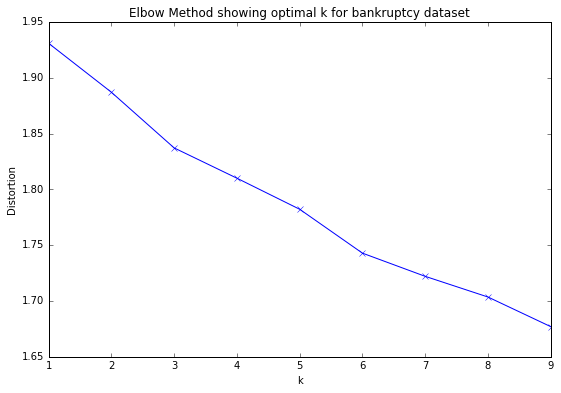

In [192]:
elbow_method(unlabeled_bankruptcy, "bankruptcy dataset")

In [193]:
bankruptcy_tnse = TSNE(n_components=2).fit_transform(unlabeled_bankruptcy)

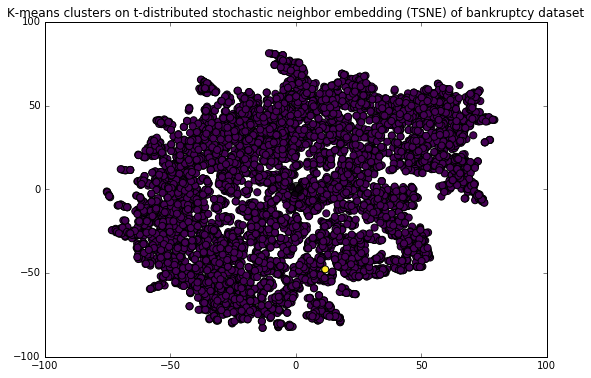

In [201]:
#Visualizing Clusters after performing kmeans on original data, binary clustering
visualize_clusters(bankruptcy_tnse, kmeans_bankruptcy, clusters_kmeans_bankruptcy, "bankruptcy dataset", "K-means")

In [240]:
kmeans_bankruptcy_optimal = KMeans(n_clusters=3, random_state=10).fit(unlabeled_bankruptcy)
clusters_kmeans_bankruptcy_optimal = kmeans_bankruptcy_optimal.labels_

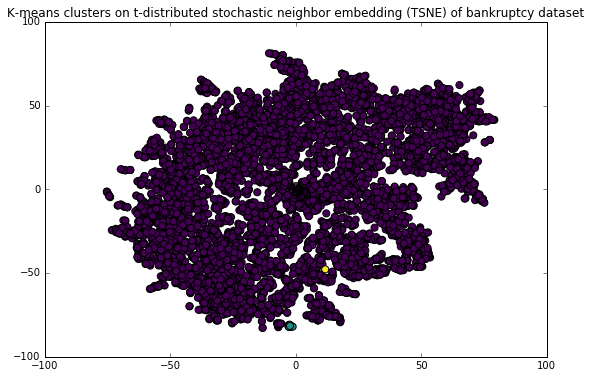

In [241]:
visualize_clusters(bankruptcy_tnse, kmeans_bankruptcy_optimal, clusters_kmeans_bankruptcy_optimal, "bankruptcy dataset", "K-means")

In [243]:
#2) EXPECTATION MAXIMIZATION

gaussian_bankruptcy = GaussianMixture(n_components=2, random_state=10).fit(unlabeled_bankruptcy)
clusters_gaussian_bankruptcy = gaussian_bankruptcy.predict(unlabeled_bankruptcy)
print(score_unsupervised_model(bankruptcy_labels, clusters_gaussian_bankruptcy))

['accuracy: 0.96058061761776', 'precision: 0.0', 'recall: 0.0', 'f1: 0.0']


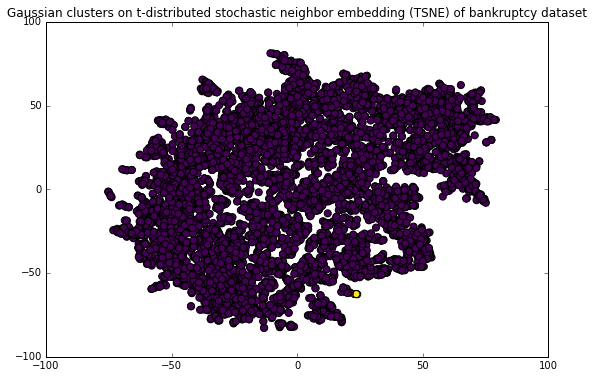

In [244]:
#Binary Gaussian Clustering
visualize_clusters(bankruptcy_tnse, gaussian_bankruptcy, clusters_gaussian_bankruptcy, "bankruptcy dataset", "Gaussian", has_centers=False)

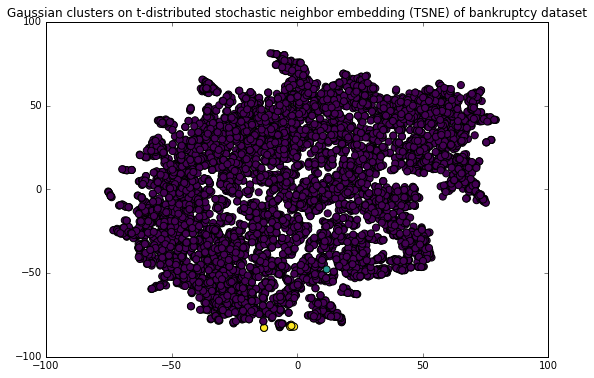

In [245]:
#Optimal Cluster Gaussian
gaussian_bankruptcy_optimal = GaussianMixture(n_components=3, random_state=0).fit(unlabeled_bankruptcy)
clusters_gaussian_bankruptcy_optimal = gaussian_bankruptcy_optimal.predict(unlabeled_bankruptcy)
visualize_clusters(bankruptcy_tnse, gaussian_bankruptcy_optimal, clusters_gaussian_bankruptcy_optimal, "bankruptcy dataset", "Gaussian", has_centers=False)

In [612]:
#1) PCA

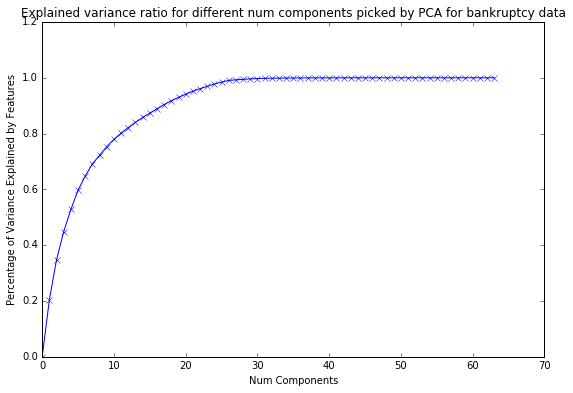

In [613]:
num_components_vs_explained_ratio(unlabeled_bankruptcy, "bankruptcy data", "PCA")

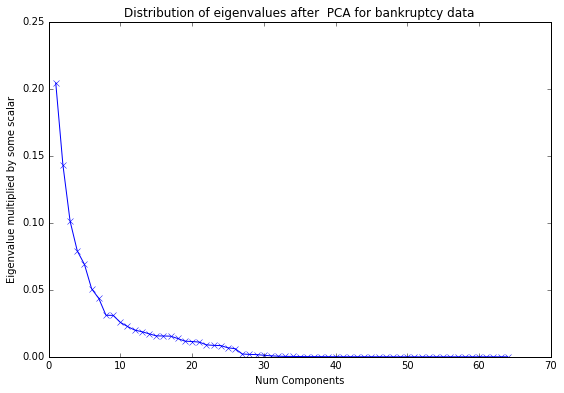

In [614]:
eigenvalue_distribution(unlabeled_bankruptcy, "bankruptcy data", "PCA")

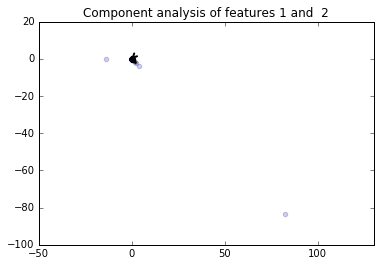

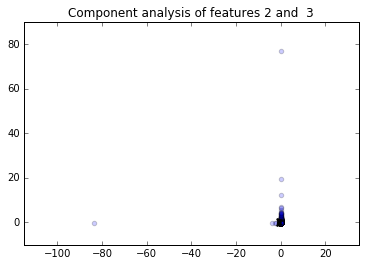

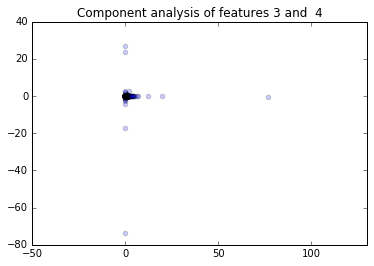

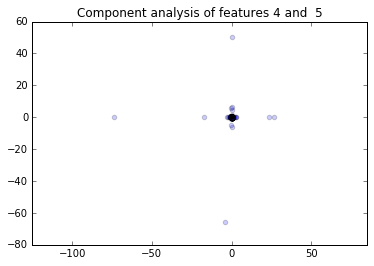

In [629]:
for i in range(1, 5):
    visualize_PCA(unlabeled_bankruptcy, i, i+1)

In [631]:
pca_bankruptcy = reduce_dataset_PCA(unlabeled_bankruptcy, 11)

In [ ]:
#2) ICA

In [638]:
bankruptcy_kurts = get_ICA_components_kurtosis(unlabeled_bankruptcy)

/Users/chaitanyamittal/anaconda/lib/python3.5/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


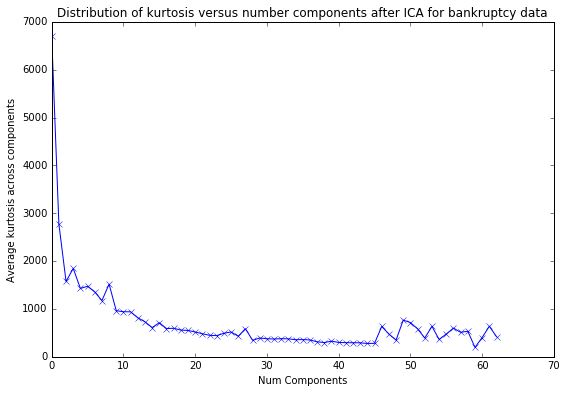

In [650]:
plot_kurtosis(bankruptcy_kurts[0:63], "bankruptcy data")

In [651]:
ica_bankruptcy = reduce_dataset_ICA(unlabeled_bankruptcy, 8)

In [652]:
bankruptcy_loss_ica = loss_through_ICA(unlabeled_bankruptcy)

/Users/chaitanyamittal/anaconda/lib/python3.5/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


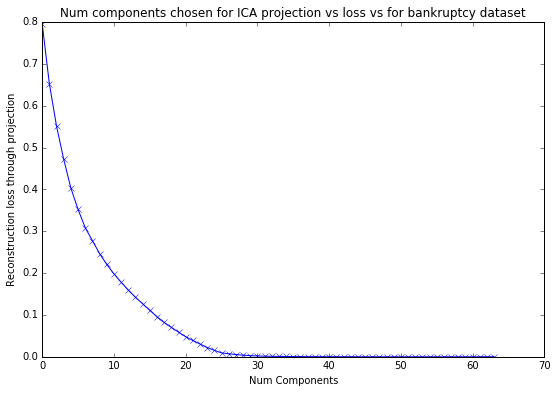

In [653]:
plot_ica_loss(bankruptcy_loss_ica, "bankruptcy dataset")

In [ ]:
#3) Randomized Projections

In [656]:
bankruptcy_loss_RP = loss_through_RP(unlabeled_bankruptcy)

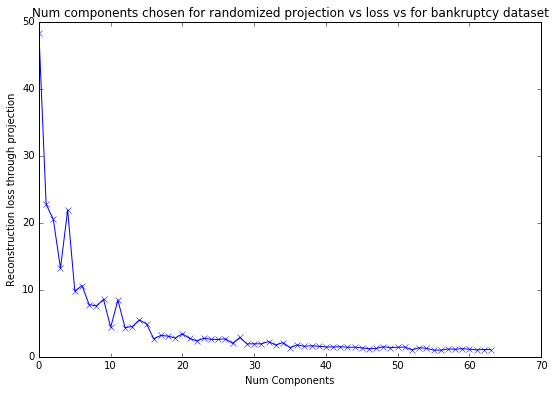

In [657]:
plot_rp_loss(bankruptcy_loss_RP, "bankruptcy dataset")

In [661]:
randomized_bankruptcy = reduce_dataset_randomized(unlabeled_bankruptcy, 15)

In [662]:
bankruptcy_loss_rp_iter = run_randomized_projections_n_times(unlabeled_bankruptcy, 100, 6)

/Users/chaitanyamittal/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/chaitanyamittal/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


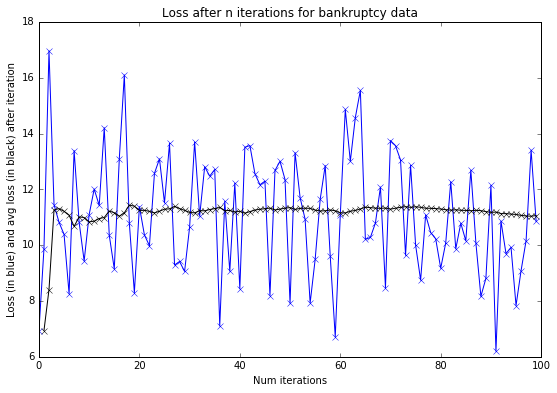

In [667]:
avg_loss_bankruptcy = []
for i in range(len(bank_loss_rp_iter)):
    avg_loss_bankruptcy.append(np.mean(bankruptcy_loss_rp_iter[0:i]))
plot_rp_n_iterations(bankruptcy_loss_rp_iter, avg_loss_bankruptcy, "bankruptcy data")

In [ ]:
 #4 FeatureAgglomeration

In [668]:
bankruptcy_loss_fa = loss_through_FA(unlabeled_bankruptcy)

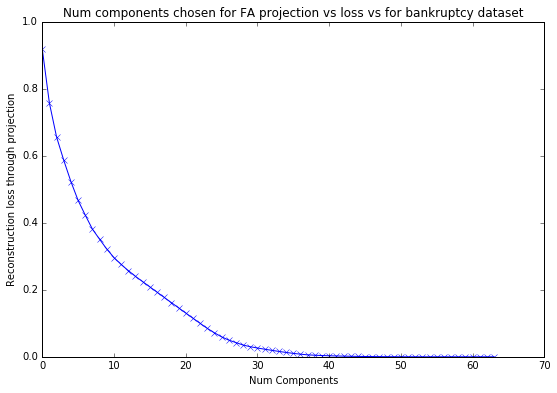

In [857]:
plot_fa_loss(bankruptcy_loss_fa, "bankruptcy dataset")

In [670]:
fa_bankruptcy = reduce_dataset_fa(unlabeled_bankruptcy, 15)